In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import pandas as pd

# Ejercicio 2
Elaborar una función en Python que permita comparar dos muestras (puede ser dos muestras provenientes de distribuciones
teóricas, una teórica y una a partir de datos, o dos muestras provenientes a partir de datos).

La función debe mostrar:

* Las funciones de densidad f1 y f2.
* Las funciones de distribución F1 y F2.
* Una gráfica PP (prob-prob).
* Una gráfica QQ (quantil-quantil).

Además, debe calcular la distancia de Kolmogorov-Smirnov (KS), e ilustrar en las gráficas de densidad y de distribución, el
punto donde se alcanza esta distancia KS. Realizar una prueba de hipótesis de Kolmogorov-Smirnov para comparar dichas
muestras.

Usar alguno de los experimentos del ejercicio anterior (con un valor p y N fijo), y comparar la distribución obtenida del
experimento, contra una muestra generada aleatoriamente de la distribución geométrica:

* Geom(p).
* Geom(q), para q = 1.2p (cuidar que 0 < q < 1)

Las distribuciones escogidas son:

* Exponencial:

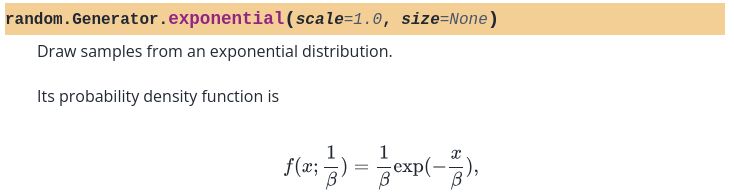

* Beta:
* 
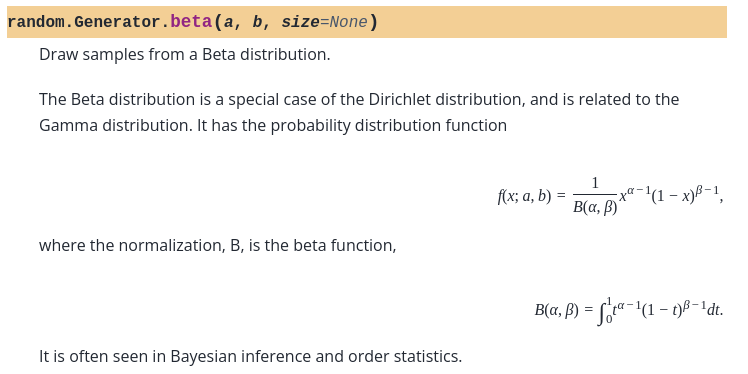

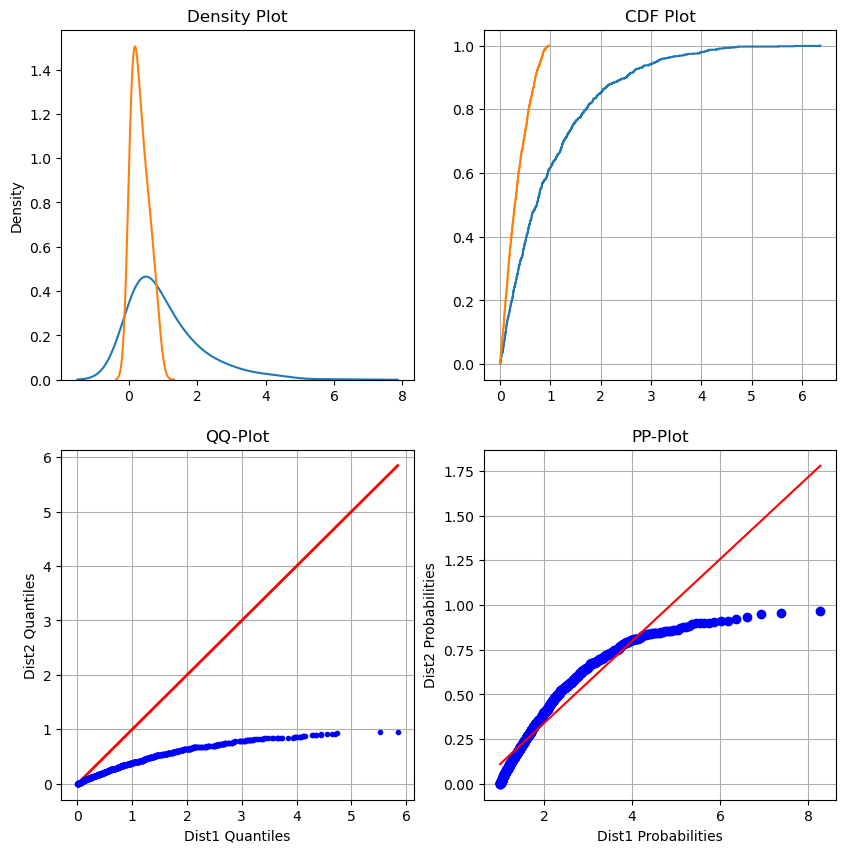

La prueba KS dice:
KstestResult(statistic=np.float64(0.419), pvalue=np.float64(4.9383656742309225e-79), statistic_location=np.float64(0.7486082709455226), statistic_sign=np.int8(-1))


In [2]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def compareDistributions(aTitle, distA, spsProbA, bTitle, distB, spsProbB):
    x1, y1 = ecdf(distA)
    x2, y2 = ecdf(distB)
    plt.figure(figsize=(10, 10))
    
    # Density Functions DF
    plt.subplot(2,2,1)
    sns.kdeplot(distA, bw_method=0.5, label=aTitle)
    sns.kdeplot(distB, bw_method=0.5, label=bTitle)
    plt.title('Density Plot')
    
    # Distribution Functions CDF
    plt.subplot(2,2,2)
    plt.plot(x1, y1, drawstyle='steps-post')
    plt.plot(x2, y2, drawstyle='steps-post')
    plt.grid(True)
    plt.title('CDF Plot')
    
    # QQ-plot
    plt.subplot(2,2,3)
    qqs = np.linspace(0., 1., 1001)[:-1]
    qq1 = np.quantile(distA, qqs)
    qq2 = np.quantile(distB, qqs)
    minq = min(qq1.min(), qq2.min())
    maxq = max(qq1.max(), qq2.max())
    plt.plot([minq,maxq], [minq,maxq], 'r-', lw=2)
    plt.plot(qq1, qq2, 'b.', drawstyle='steps-post')
    plt.grid(True)
    plt.title('QQ-Plot')
    plt.xlabel('Dist1 Quantiles')
    plt.ylabel('Dist2 Quantiles') 
    
    # PP-plot
    plt.subplot(2,2,4)
    sps.probplot(distB, dist=spsProbA, plot=plt)
    plt.grid(True)
    plt.title('PP-Plot')
    plt.xlabel('Dist1 Probabilities')
    plt.ylabel('Dist2 Probabilities') 

    plt.show()

    print("La prueba KS dice:")
    print(sps.kstest(distA, distB))

size = 1000
rng = np.random.default_rng()
exp = rng.exponential(size=size)
beta = rng.beta(1, 2, size=size)

compareDistributions("Exponencial", exp, sps.expon(1), "Beta", beta, sps.beta(1,2))

# Ejercicio 3

Aplicar las comparaciones del Ejercicio 4, así como la prueba estadística de Kolmogorov-Smirnov para determinar si los datos
del primer dígito no-nulo en el conjunto de áreas se comporta de acuerdo a la ley de Benford o no. Explique sus conclusiones.

In [14]:
data = pd.read_csv("areas.csv", sep=";")
print(data)

sampleSize = len(data.loc[:,"Area in square kilometres"])

           Country  Area in square miles  Area in square kilometres  \
0           Russia            6592850.00                17075400.00   
1           Canada            3855103.00                 9984670.00   
2    United States            3797173.00                 9834633.00   
3            China            3696118.00                 9572900.00   
4           Brazil            3282907.00                 8502728.00   
..             ...                   ...                        ...   
218          Macau                 13.00                      33.00   
219         Tuvalu                 10.00                      26.00   
220          Nauru                  8.00                      21.00   
221         Monaco                  0.80                       2.10   
222   Vatican City                  0.17                       0.44   

     Total area rank  
0                  1  
1                  2  
2                  3  
3                  4  
4                  5  
..       